In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
sns.set() # set the default Seaborn style for graphics

In [2]:
df = pd.read_csv('lab_results_1.csv')

In [3]:
# Assuming df is the original DataFrame
# Check and handle missing values
print(df[['n', 's', 'time_taken_ms', 'n_compares']].isna().sum())
df_cleaned = df.dropna(subset=['n', 's', 'time_taken_ms', 'n_compares'])

# Experiment 1: Vary n while keeping s = 42
experiment_1_df = df_cleaned[df_cleaned['s'] == 42]

# Group by 'n' and calculate mean for the relevant columns
experiment_1_mean_df = experiment_1_df.groupby('n')[['time_taken_ms', 'n_compares']].mean().reset_index()
experiment_1_mean_df.columns = ['Input Size (n)', 'Mean Time Taken (ms)', 'Mean Number of Comparisons']

# Output results for Experiment 1
print("Experiment 1: Vary n while s = 42")
print(experiment_1_mean_df.head())
print(f"Original DataFrame rows for Experiment 1: {experiment_1_df.shape[0]}")
print(f"Grouped DataFrame rows for Experiment 1: {experiment_1_mean_df.shape[0]}")

n                0
s                0
time_taken_ms    0
n_compares       0
dtype: int64
Experiment 1: Vary n while s = 42
   Input Size (n)  Mean Time Taken (ms)  Mean Number of Comparisons
0            1000             24.666667                1.339067e+04
1           10000            367.800000                1.835439e+05
2          100000           5137.133333                1.861966e+06
3         1000000          61838.500000                2.318488e+07
4        10000000         780380.733333                2.812546e+08
Original DataFrame rows for Experiment 1: 180
Grouped DataFrame rows for Experiment 1: 5


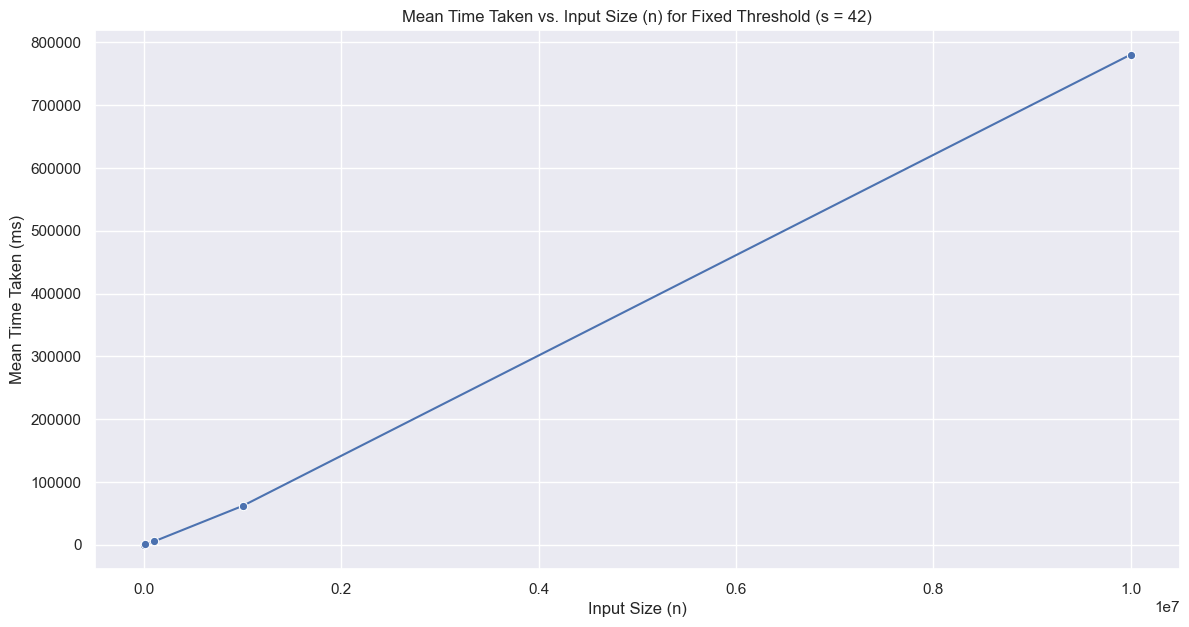

In [4]:
# Plot Mean Time Taken vs. Input Size (n) for s = 42
plt.figure(figsize=(14, 7))
sns.lineplot(data=experiment_1_mean_df, x='Input Size (n)', y='Mean Time Taken (ms)', marker='o')

# Use logarithmic scale for the x-axis (optional for larger ranges of n)
plt.xscale('linear')  
plt.title('Mean Time Taken vs. Input Size (n) for Fixed Threshold (s = 42)')
plt.xlabel('Input Size (n)')
plt.ylabel('Mean Time Taken (ms)')
plt.show()

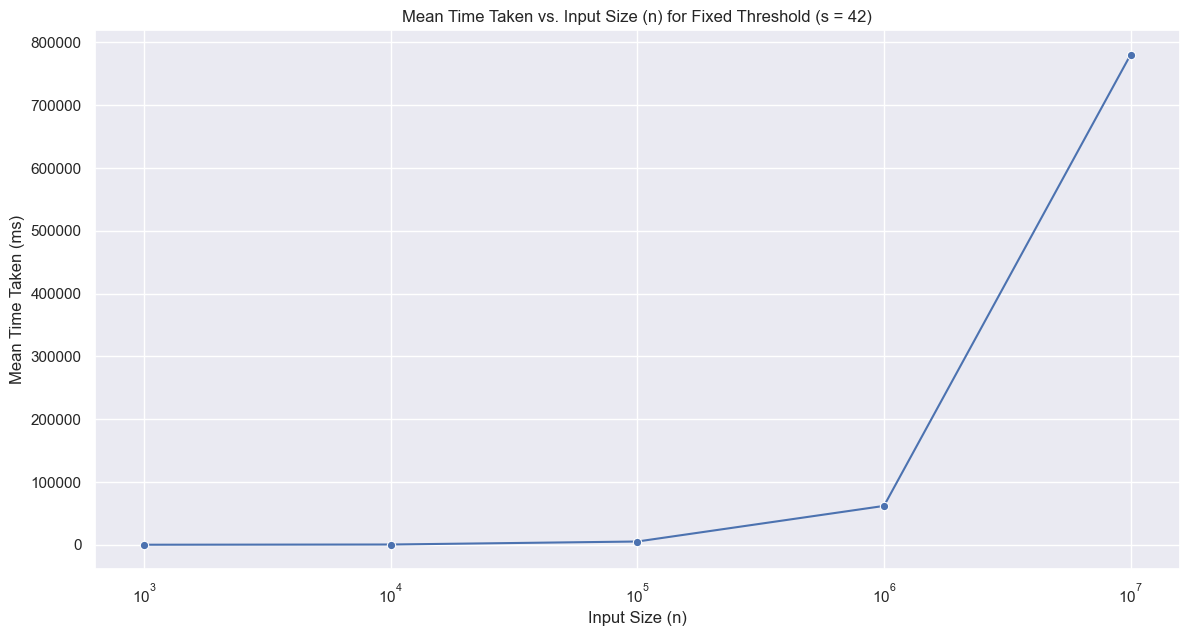

In [5]:
# Plot Mean Time Taken vs. Input Size (n) for s = 42
plt.figure(figsize=(14, 7))
sns.lineplot(data=experiment_1_mean_df, x='Input Size (n)', y='Mean Time Taken (ms)', marker='o')

# Use logarithmic scale for the x-axis (optional for larger ranges of n)
plt.xscale('log')  
plt.yscale('linear')
plt.title('Mean Time Taken vs. Input Size (n) for Fixed Threshold (s = 42)')
plt.xlabel('Input Size (n)')
plt.ylabel('Mean Time Taken (ms)')
plt.show()

In [6]:
# Experiment 2: Vary s while keeping n = 1000
experiment_2_df = df_cleaned[df_cleaned['n'] == 1000]

# Group by 's' and calculate mean for the relevant columns
experiment_2_mean_df = experiment_2_df.groupby('s')[['time_taken_ms', 'n_compares']].mean().reset_index()
experiment_2_mean_df.columns = ['Threshold (s)', 'Mean Time Taken (ms)', 'Mean Number of Comparisons']

# Output results for Experiment 2
print("Experiment 2: Vary s while n = 1000")
print(experiment_2_mean_df.head())
print(f"Original DataFrame rows for Experiment 2: {experiment_2_df.shape[0]}")
print(f"Grouped DataFrame rows for Experiment 2: {experiment_2_mean_df.shape[0]}")

Experiment 2: Vary s while n = 1000
   Threshold (s)  Mean Time Taken (ms)  Mean Number of Comparisons
0              1             88.066667                 8708.033333
1              2             58.300000                 8708.033333
2              3             57.533333                 8708.500000
3              4             91.200000                 8768.033333
4              5             44.233333                 8768.033333
Original DataFrame rows for Experiment 2: 30030
Grouped DataFrame rows for Experiment 2: 1000


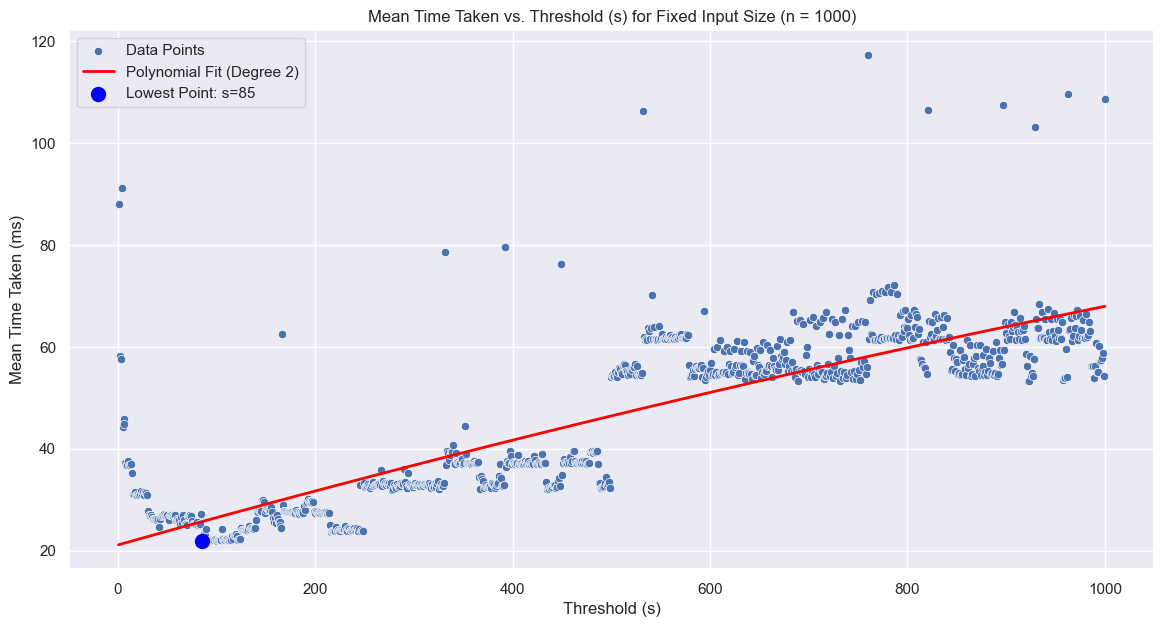

In [7]:
# Find the minimum Mean Time Taken and its corresponding Threshold
min_time_taken = experiment_2_mean_df['Mean Time Taken (ms)'].min()
min_threshold = experiment_2_mean_df[experiment_2_mean_df['Mean Time Taken (ms)'] == min_time_taken]['Threshold (s)'].values[0]

# Fit a polynomial regression (e.g., degree 2) for the relationship between 'Threshold (s)' and 'Mean Time Taken (ms)'
poly_coeff = np.polyfit(experiment_2_mean_df['Threshold (s)'], experiment_2_mean_df['Mean Time Taken (ms)'], deg=2)
poly_func = np.poly1d(poly_coeff)

# Generate a range of x values (thresholds) for plotting the polynomial curve
x_vals = np.linspace(experiment_2_mean_df['Threshold (s)'].min(), experiment_2_mean_df['Threshold (s)'].max(), 500)
y_vals = poly_func(x_vals)

# Plot the original data and the polynomial fit curve
plt.figure(figsize=(14, 7))
sns.scatterplot(data=experiment_2_mean_df, x='Threshold (s)', y='Mean Time Taken (ms)', marker='o', label='Data Points')

# Plot the polynomial fit curve
plt.plot(x_vals, y_vals, color='red', label=f'Polynomial Fit (Degree 2)', linewidth=2)

# Highlight the minimum point
plt.scatter(min_threshold, min_time_taken, color='blue', s=100, zorder=5, label=f'Lowest Point: s={min_threshold}')

# Add plot title and labels
plt.xscale('linear')  # linear scale for Threshold (s)
plt.yscale('linear') 
plt.title('Mean Time Taken vs. Threshold (s) for Fixed Input Size (n = 1000)')
plt.xlabel('Threshold (s)')
plt.ylabel('Mean Time Taken (ms)')
plt.legend()
plt.show()

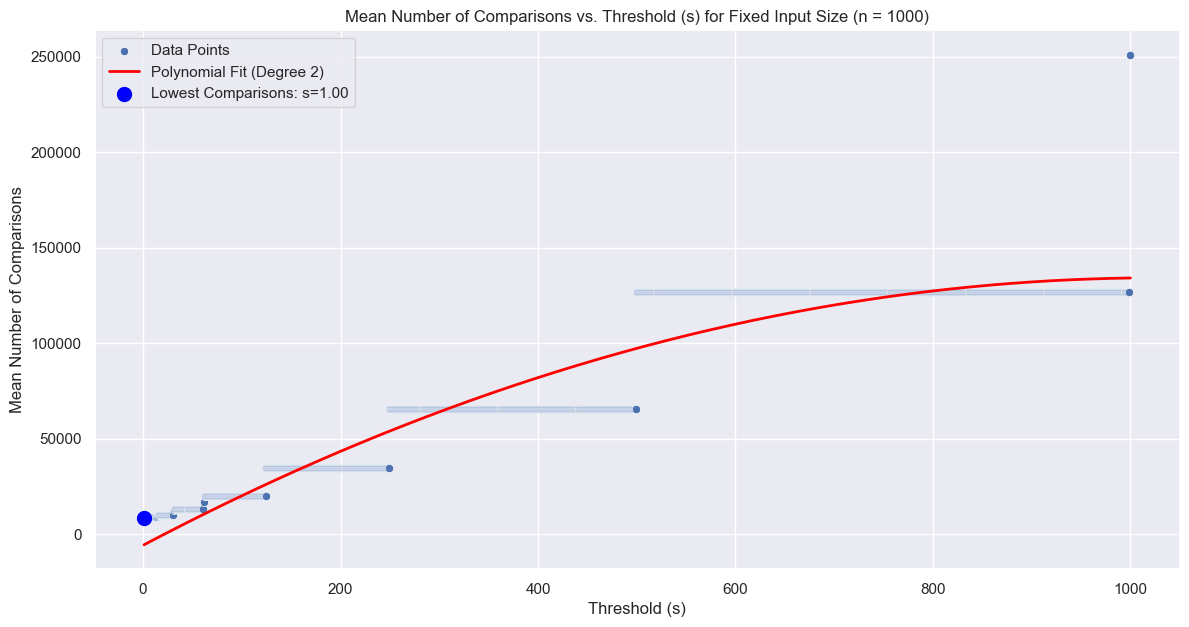

In [8]:
# Find the minimum Mean Number of Comparisons and its corresponding Threshold
min_comparisons = experiment_2_mean_df['Mean Number of Comparisons'].min()
min_threshold = experiment_2_mean_df[experiment_2_mean_df['Mean Number of Comparisons'] == min_comparisons]['Threshold (s)'].values[0]

# Fit a polynomial regression (e.g., degree 2) for the relationship between 'Threshold (s)' and 'Mean Number of Comparisons'
poly_coeff = np.polyfit(experiment_2_mean_df['Threshold (s)'], experiment_2_mean_df['Mean Number of Comparisons'], deg=2)
poly_func = np.poly1d(poly_coeff)

# Generate a range of x values (thresholds) for plotting the polynomial curve
x_vals = np.linspace(experiment_2_mean_df['Threshold (s)'].min(), experiment_2_mean_df['Threshold (s)'].max(), 500)
y_vals = poly_func(x_vals)

# Plot the original data and the polynomial fit curve
plt.figure(figsize=(14, 7))
sns.scatterplot(data=experiment_2_mean_df, x='Threshold (s)', y='Mean Number of Comparisons', marker='o', label='Data Points')

# Plot the polynomial fit curve
plt.plot(x_vals, y_vals, color='red', label=f'Polynomial Fit (Degree 2)', linewidth=2)

# Highlight the minimum point
plt.scatter(min_threshold, min_comparisons, color='blue', s=100, zorder=5, label=f'Lowest Comparisons: s={min_threshold:.2f}')

# Add plot title and labels
plt.xscale('linear')  # linear scale for Threshold (s)
plt.yscale('linear') 
plt.title('Mean Number of Comparisons vs. Threshold (s) for Fixed Input Size (n = 1000)')
plt.xlabel('Threshold (s)')
plt.ylabel('Mean Number of Comparisons')
plt.legend()
plt.show()

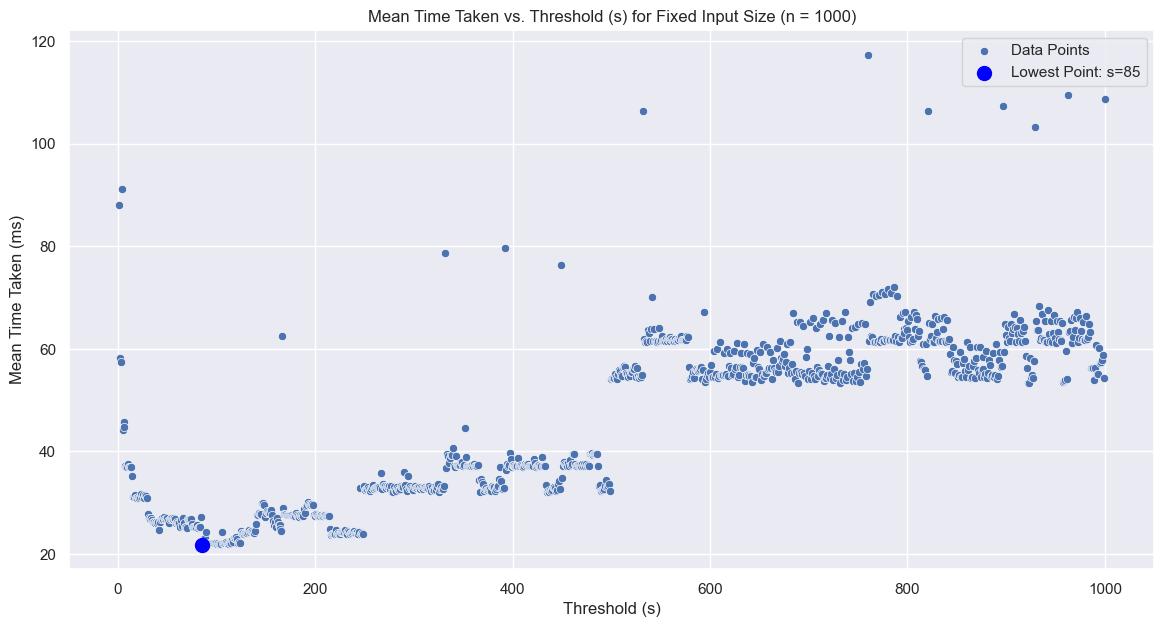

In [9]:
# Find the minimum Mean Time Taken and its corresponding Threshold
min_time_taken = experiment_2_mean_df['Mean Time Taken (ms)'].min()
min_threshold = experiment_2_mean_df[experiment_2_mean_df['Mean Time Taken (ms)'] == min_time_taken]['Threshold (s)'].values[0]

# Plot the original data
plt.figure(figsize=(14, 7))
sns.scatterplot(data=experiment_2_mean_df, x='Threshold (s)', y='Mean Time Taken (ms)', marker='o', label='Data Points')

# Highlight the minimum point
plt.scatter(min_threshold, min_time_taken, color='blue', s=100, zorder=5, label=f'Lowest Point: s={min_threshold}')

# Add plot title and labels
plt.xscale('linear')  # Use linear scale for Threshold (s)
plt.yscale('linear') 
plt.title('Mean Time Taken vs. Threshold (s) for Fixed Input Size (n = 1000)')
plt.xlabel('Threshold (s)')
plt.ylabel('Mean Time Taken (ms)')
plt.legend()
plt.show()